<a href="https://colab.research.google.com/github/tianchu-shu/NWMSS/blob/main/In_person_vs_remote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [5]:
#Data saved in csv/excel
import glob, os
import pandas as pd

data_dir= '/content/gdrive/My Drive/Avera/'
os.chdir(data_dir)

In [12]:
!ls

'Rapid City'


In [20]:
!ls 'Rapid City'

EPRC_00032  EPRC_00162	EPRC_00179  EPRC_00183	EPRC_00380
EPRC_00160  EPRC_00173	EPRC_00181  EPRC_00191	EPRC_00550


#Compute the Total response time in minutes

In [166]:
# get all y.txt files from all subdirectories

all_files = glob.glob('/content/gdrive/My Drive/Avera/Rapid City/*/In Person/*CB_Data.csv')
all_files = glob.glob('/content/gdrive/My Drive/Avera/Rapid City/*/Remote/*CB_Data_R.csv')

doc =[]
for file in all_files:
  data = pd.read_csv(file)
  doc.append(data)


df = pd.concat(doc)

In [167]:
df['PIN'] = df['PIN'].str[7:17]

In [192]:
df['InstStarted']= pd.to_datetime(df['InstStarted'])

In [193]:
df['InstEnded']= pd.to_datetime(df['InstEnded'])

In [198]:
df[df['PIN']=='EPRC_00162']

,PIN,DeviceID,Assessment Name,InstOrdr,InstSctn,ItmOrdr,Inst,Locale,ItemID,Response,Score,Theta,TScore,SE,DataType,Position,ResponseTime,DateCreated,InstStarted,InstEnded,App Version,iPad Version,Firmware Version,Name,Age,Education,MothersEducation,FathersEducation,GuardiansEducation,StartingLevelOverride,Gender,Handedness,Race,Ethnicity


In [195]:
mni =df.groupby(['PIN','Inst'])['InstStarted','InstEnded'].first().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [171]:
mni['Time']=mni['InstEnded']-mni['InstStarted']

In [187]:
rv =mni.groupby(['PIN'])['Time'].sum().reset_index()

In [188]:
rv['Time']=round(rv['Time'].dt.total_seconds()/60,2)

In [189]:
rv

,PIN,Time
0,EPRC_00032,27.20
1,EPRC_00160,31.40
2,EPRC_00179,27.92
3,EPRC_00181,27.35
4,EPRC_00183,23.12
5,EPRC_00191,28.25
6,EPRC_00380,27.92


In [174]:
rv['Time'].mean()

27.594285714285718

In [165]:
IP = rv
IP['Time'].mean()

35.497499999999995

In [273]:
IP.Time

0    36.33
1    35.68
2    33.65
3    42.67
4    30.22
5    31.72
6    33.48
7    40.23
Name: Time, dtype: float64

In [274]:
times= pd.merge(IP, rv, on=["PIN"])

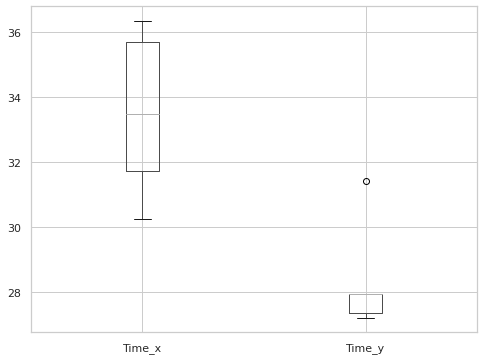

In [276]:
import matplotlib.pyplot as plt

# Box plot of ACS In person vs. Remote
plt.figure(figsize=(8, 6))
times.boxplot(column=['Time_x', 'Time_y'])

plt.show()

#A matched t-test for those who have both in-person and remote - Total Time

In [199]:
from scipy import stats
stats.ttest_ind(IP.Time, rv.Time, equal_var=False)

Ttest_indResult(statistic=4.518502487970915, pvalue=0.0007983802904864124)

In [ ]:
stats.wilcoxon(IP.Time, rv.Time, alternative='greater')

#Composites (age-corrected and fully-corrected scores)Scores

In [227]:
# get all y.txt files from all subdirectories

#all_files = glob.glob('/content/gdrive/My Drive/Avera/Rapid City/*/In Person/*CB_Scores.csv')
all_files = glob.glob('/content/gdrive/My Drive/Avera/Rapid City/*/Remote/*CB_Scores_R.csv')

doc =[]
for file in all_files:
  data = pd.read_csv(file)
  doc.append(data)


df = pd.concat(doc)

In [228]:
df.shape

(54, 28)

In [229]:
df['PIN'] = df['PIN'].str[7:17]

In [230]:
df=df.dropna(axis=1, how='all')

In [231]:
df.head(5)

,PIN,DeviceID,Assessment Name,Inst,RawScore,Theta,SE,ItmCnt,DateFinished,Language,Computed Score,Uncorrected Standard Score,Age-Corrected Standard Score,National Percentile (age adjusted),Fully-Corrected T-score,InstrumentBreakoff,InstrumentStatus2,InstrumentRCReason,InstrumentRCReasonOther,App Version,iPad Version,Firmware Version
0,EPRC_00032,4C0D4D8F-B79D-47C3-AF1A-4D100D11BF28,Assessment 1,NIH Toolbox Picture Vocabulary Test Age 3+ v2.1,NaN,-1.730,0.482,24.0,2021-04-06 16:00:45,en-US,NaN,74.0,95.0,36.0,44.0,2.0,3.0,NaN,NaN,1.23.4532 (Participant),"iPad Pro 1st Gen (10.5-inch) / iPad7,3",14.4.1
1,EPRC_00032,4C0D4D8F-B79D-47C3-AF1A-4D100D11BF28,Assessment 1,NIH Toolbox Oral Reading Recognition Test Age ...,NaN,-4.995,0.500,22.0,2021-04-06 16:03:04,en-US,NaN,78.0,80.0,10.0,34.0,2.0,3.0,NaN,NaN,1.23.4532 (Participant),"iPad Pro 1st Gen (10.5-inch) / iPad7,3",14.4.1
2,EPRC_00032,4C0D4D8F-B79D-47C3-AF1A-4D100D11BF28,Assessment 1,NIH Toolbox Pattern Comparison Processing Spee...,34.0,NaN,NaN,37.0,2021-04-06 16:06:44,en-US,39.00,80.0,86.0,18.0,39.0,2.0,3.0,NaN,NaN,1.23.4532 (Participant),"iPad Pro 1st Gen (10.5-inch) / iPad7,3",14.4.1
3,EPRC_00032,4C0D4D8F-B79D-47C3-AF1A-4D100D11BF28,Assessment 1,NIH Toolbox Picture Sequence Memory Test Age 8...,19.0,0.238,0.310,6.0,2021-04-06 16:14:56,en-US,585.56,115.0,121.0,92.0,62.0,2.0,3.0,NaN,NaN,1.23.4532 (Participant),"iPad Pro 1st Gen (10.5-inch) / iPad7,3",14.4.1
4,EPRC_00032,4C0D4D8F-B79D-47C3-AF1A-4D100D11BF28,Assessment 1,NIH Toolbox Flanker Inhibitory Control and Att...,20.0,NaN,NaN,24.0,2021-04-06 16:18:57,en-US,6.79,85.0,83.0,13.0,38.0,2.0,3.0,NaN,NaN,1.23.4532 (Participant),"iPad Pro 1st Gen (10.5-inch) / iPad7,3",14.4.1


In [232]:
keep =['PIN', 'Inst', 'RawScore', 'Theta', 'SE',
       'ItmCnt', 'Computed Score',
       'Uncorrected Standard Score', 'Age-Corrected Standard Score',
       'National Percentile (age adjusted)', 'Fully-Corrected T-score',
       'InstrumentBreakoff', 'InstrumentStatus2']

In [233]:
df=df[keep]

In [234]:
df.Inst.unique()

array(['NIH Toolbox Picture Vocabulary Test Age 3+ v2.1',
       'NIH Toolbox Oral Reading Recognition Test Age 3+ v2.1',
       'NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1',
       'NIH Toolbox Picture Sequence Memory Test Age 8+ Form A v2.1',
       'NIH Toolbox Flanker Inhibitory Control and Attention Test Ages 8-11 v2.1',
       'NIH Toolbox Dimensional Change Card Sort Test Ages 8-11 v2.1',
       'Cognition Crystallized Composite v1.1',
       'Cognition Early Childhood Composite v1.1',
       'NIH Toolbox Picture Sequence Memory Test Age 8+ Form B v2.1'],
      dtype=object)

In [235]:
#Differentiate the rows contain Composites
comp =df[df['Inst'].str.contains("Composite")]
raw =df[~df['Inst'].str.contains("Composite")]

In [236]:
raw=raw.dropna(axis=1, how='all')
raw.head()

,PIN,Inst,RawScore,Theta,SE,ItmCnt,Language,Computed Score,Uncorrected Standard Score,Age-Corrected Standard Score,National Percentile (age adjusted),Fully-Corrected T-score,InstrumentBreakoff,InstrumentStatus2
0,EPRC_00032,NIH Toolbox Picture Vocabulary Test Age 3+ v2.1,NaN,-1.730,0.482,24.0,en-US,NaN,74.0,95.0,36.0,44.0,2.0,3.0
1,EPRC_00032,NIH Toolbox Oral Reading Recognition Test Age ...,NaN,-4.995,0.500,22.0,en-US,NaN,78.0,80.0,10.0,34.0,2.0,3.0
2,EPRC_00032,NIH Toolbox Pattern Comparison Processing Spee...,34.0,NaN,NaN,37.0,en-US,39.00,80.0,86.0,18.0,39.0,2.0,3.0
3,EPRC_00032,NIH Toolbox Picture Sequence Memory Test Age 8...,19.0,0.238,0.310,6.0,en-US,585.56,115.0,121.0,92.0,62.0,2.0,3.0
4,EPRC_00032,NIH Toolbox Flanker Inhibitory Control and Att...,20.0,NaN,NaN,24.0,en-US,6.79,85.0,83.0,13.0,38.0,2.0,3.0


In [237]:
comp=comp.dropna(axis=1, how='all')
comp.head()

,PIN,Inst,Language,Uncorrected Standard Score,Age-Corrected Standard Score,National Percentile (age adjusted),Fully-Corrected T-score
6,EPRC_00032,Cognition Crystallized Composite v1.1,en-US,74.0,85.0,16.0,38.0
7,EPRC_00032,Cognition Early Childhood Composite v1.1,en-US,85.0,98.0,44.0,43.0
6,EPRC_00160,Cognition Crystallized Composite v1.1,en-US,83.0,106.0,66.0,51.0
7,EPRC_00160,Cognition Early Childhood Composite v1.1,en-US,79.0,92.0,29.0,42.0
6,EPRC_00173,Cognition Crystallized Composite v1.1,en-US,63.0,72.0,3.0,39.0


In [226]:
comp_ip = comp
raw_ip =raw

In [254]:
scores = pd.merge(comp_ip, comp, on=["PIN",'Inst'])

In [ ]:
scores

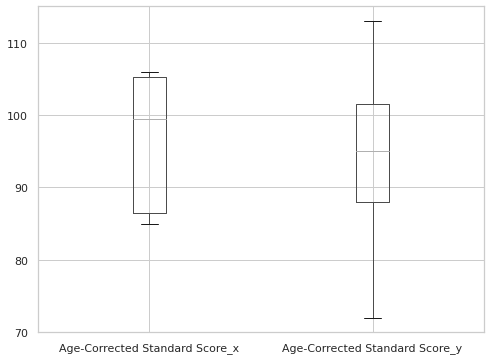

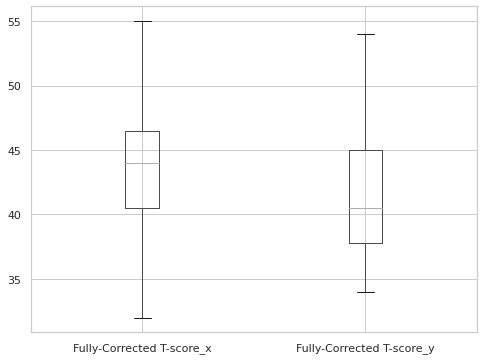

In [272]:
import matplotlib.pyplot as plt

# Box plot of ACS In person vs. Remote
plt.figure(figsize=(8, 6))
scores.boxplot(column=['Age-Corrected Standard Score_x', 'Age-Corrected Standard Score_y'])

plt.figure(figsize=(8, 6))
scores.boxplot(column=['Fully-Corrected T-score_x', 'Fully-Corrected T-score_y'])



plt.show()

In [246]:
stats.ttest_ind(comp_ip['Age-Corrected Standard Score'], comp['Age-Corrected Standard Score'], equal_var=False)

Ttest_indResult(statistic=0.07344449546920352, pvalue=0.9423596013653743)

In [239]:
stats.ttest_ind(comp_ip['Fully-Corrected T-score'], comp['Fully-Corrected T-score'], equal_var=False)

Ttest_indResult(statistic=-0.3791891948572099, pvalue=0.7088454421322545)